In [48]:

import pandas as pd
import numpy as np

from scipy import stats

import os 

os.chdir("/home/ptruong/git/dia_sum/scripts/PXD002952")

from q_value import qvalues
from triqler_output_to_df import  parse_triqler
#os.chdir("/hdd_14T/data/PXD002952/osw_res_20210303/hye124/ttof6600/32fix/full_ts_v")

os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")

In [49]:
import seaborn as sns

sns.set_context("poster")

In [50]:

# filename has different formatting, we need to change number or implement regex.
experiment_id_mapper = lambda x: x.split("_")[5]
sample_id_mapper = lambda x: x.split("_")[8] #hye124 
specie_mapper = lambda x: x.split("_")[-1]

def read_in_and_filter(filename, m_score_treshold = 0.01):  
    print(filename)
    df = pd.read_csv(filename, sep = "\t")
    df = df[df.decoy != 1]
    df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
    
    print(str(len(df)) + " significantly identified peptides at " + str(0.01) + " FDR-treshold.")
    print(str(len(df.ProteinName.unique())) + " significantly identified proteins at " + str(0.01) + " FDR-treshold.")
    print("")
    df["experiment_id"] = df["filename"].map(experiment_id_mapper)
    df["sample_id"] = df["filename"].map(sample_id_mapper)
    sample_id = df.sample_id.unique()[0]
    experiment_id = df.experiment_id.unique()[0]     

    #midx = pd.MultiIndex(levels = [[sample_id],[experiment_id]], codes = [[0],[0]], names = ["sample_id", "experiment_id"])
    df["specie"] = df["ProteinName"].map(specie_mapper)
    df = df.set_index(["specie", "ProteinName", "FullPeptideName", "sample_id", "experiment_id"])
    df = df[["Intensity"]]
    df = pd.DataFrame(df.values, index = df.index)
    
    return df


In [51]:
filename = "osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedro_-_Sample_2_-_SW32_-_Repl1.mzML_with_dscore.csv"
#m_score_treshold = 0.01
m_score_treshold = 0.00079433
#m_score_treshold = 1.00
df = pd.read_csv(filename, sep = "\t")
df = df[df.decoy != 1]
df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
print("")
df["experiment_id"] = df["filename"].map(experiment_id_mapper)
df["sample_id"] = df["filename"].map(sample_id_mapper)
sample_id = df.sample_id.unique()[0]
experiment_id = df.experiment_id.unique()[0] 



12023 significantly identified peptides at 0.00079433 FDR-treshold.



In [52]:
df


,transition_group_id,peptide_group_label,run_id,filename,RT,id,Sequence,MC,FullPeptideName,Charge,...,aggr_Peak_Area,aggr_Peak_Apex,aggr_Fragment_Annotation,rt_fwhm,masserror_ppm,d_score,m_score,peak_group_rank,experiment_id,sample_id
1,10082_run0,10082,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2453.629739,f_13840781127629990585,NHTWSEFER,0,NHTWSEFER,3,...,0.0;35.345806;11.945334;1.565875;0.0;1.624151;...,2.825662136077881;11.455251932144165;8.9833288...,389;390;391;392;393;394;395;396;397;398;399;40...,24.847999999979948;14.1999999999598;7.09999999...,NaN,2.977562,0.000676,1,003-Pedro,2
27,10169_run0,10169,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,4392.858645,f_5024151980780228768,NIIFFGK,0,NIIFFGK,2,...,34.554546;52.995873;0.0;5.007004;53.867172;0.6...,10.07509508728981;14.985214114189148;0.8592799...,6032;6033;6034;6035;6036;6037;6038;6039;6040;6041,17.749000000019805;17.749000000019805;3.548999...,NaN,4.303503,0.000018,1,003-Pedro,2
39,10225_run0,10225,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2763.528049,f_8061475781606604720,ALAIMCR,0,ALAIMC(UniMod:4)R,2,...,28.789988;4.295903;10.037566;12.991704;95.4320...,11.924682855606079;2.623162187635899;4.9352357...,5297;5298;5299;5300;5301;5302;5303;5304;5305;5306,14.199000000000069;7.100000000039927;14.199000...,NaN,4.511630,0.000010,1,003-Pedro,2
53,10267_run0,10267,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2250.899165,f_11677423016627400552,NKLDHYAIIK,1,NKLDHYAIIK,3,...,50.728786;1.173313;11.471287;0.332155;5.307486...,15.661519050598145;0.835281610488892;5.6124390...,1469;1470;1471;1472;1473;1474;1475;1476;1477;1...,24.847999999979948;7.099999999980355;10.650000...,NaN,3.213447,0.000360,1,003-Pedro,2
69,10293_run0,10293,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,2833.393199,f_7480146422539261191,NKYESYDAALSLHR,1,NKYESYDAALSLHR,4,...,0.0;0.0;3.092057;3.945836;30.46397;4.129435;52...,0.096693210303783;3.657042503356934;1.33752799...,5214;5215;5216;5217;5218;5219;5220;5221;5222;5...,10.648999999980333;17.748999999960233;10.65000...,NaN,3.201983,0.000372,1,003-Pedro,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907871,3107_run0,3107,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,6970.225730,f_11068881201625022931,INPIEDMPYDENGTPVDIVLNPLGVPSR,0,INPIEDMPYDENGTPVDIVLNPLGVPSR,3,...,26.944464;0.0;1.62358;0.0;65.06842;3.354744;6....,4.813185691833496;0.318165242671967;1.05055367...,521296;521297;521298;521299;521300;521301;5213...,35.49800000004052;35.49800000004052;28.3980000...,NaN,3.322529,0.000271,1,003-Pedro,2
907924,3121_run0,3121,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,3286.385986,f_6947613608309852467,INQVFHGSCITEGNELTK,0,INQVFHGSC(UniMod:4)ITEGNELTK,2,...,2.598569;9.716955;16.890947;2.757424;0.0;5.987...,1.839149832725525;4.701382771134377;7.22024877...,522084;522085;522086;522087;522088;522089;5220...,17.748999999959779;10.650000000000091;14.19900...,NaN,2.947756,0.000718,1,003-Pedro,2
908510,4056_run0,4056,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,6379.771909,f_12898958212559634184,KAEGGDHSMINLSVQQVLSLWAHGTVLR,1,KAEGGDHSM(UniMod:35)INLSVQQVLSLWAHGTVLR,3,...,598.570801;524.312378;27.914883;41.153572;46.7...,170.040158629417391;146.99859094619751;9.94576...,520966;520967;520968;520969;520970;520971;5209...,14.198999999999614;14.198999999999614;17.74900...,NaN,5.043897,0.000003,1,003-Pedro,2
909319,6924_run0,6924,0,HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedr...,7567.436000,f_5169388075352083421,LLPWFDGMLEADEAYFK,0,LLPWFDGMLEADEAYFK,2,...,19.199484;13.699103;12.905983;11.606292;0.0;3....,13.279813140630722;9.382444016635418;10.797778...,521617;521618;521619;521620;521621;521622;5216...,7.099999999979445;7.099999999979445;7.09999999...,NaN,3.598409,0.000130,1,003-Pedro,2


In [53]:

dfs = []
for file in os.listdir():
    if file[-10:] == "dscore.csv":
        dfs.append(read_in_and_filter(file, m_score_treshold=m_score_treshold))
        #print(len(df_part))
        #df = pd.concat([df, df_part],axis = 1)        
df = pd.concat(dfs, axis = 0)


osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_003-Pedro_-_Sample_2_-_SW32_-_Repl1.mzML_with_dscore.csv
12023 significantly identified peptides at 0.01 FDR-treshold.
2159 significantly identified proteins at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_007-Pedro_-_Sample_2_-_SW32_-_Repl3.mzML_with_dscore.csv
15208 significantly identified peptides at 0.01 FDR-treshold.
2433 significantly identified proteins at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_002-Pedro_-_Sample_1_-_SW32_-_Repl1.mzML_with_dscore.csv
12934 significantly identified peptides at 0.01 FDR-treshold.
2252 significantly identified proteins at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_005-Pedro_-_Sample_2_-_SW32_-_Repl2.mzML_with_dscore.csv
14858 significantly identified peptides at 0.01 FDR-treshold.
2427 significantly identified proteins at 0.01 FDR-treshold.

osw_output.HYE124_TTOF6600_32fix_lgillet_I150211_004-Pedro_-_Sample_1_-_SW32_-_R

In [54]:
df

0
specie ProteinName  FullPeptideName              sample_id experiment_id            
YEAST  P32527_YEAST NHTWSEFER                    2         003-Pedro      260.265869
HUMAN  P36952_HUMAN NIIFFGK                      2         003-Pedro      467.945740
       Q9UHX1_HUMAN ALAIMC(UniMod:4)R            2         003-Pedro      589.961060
       P62750_HUMAN NKLDHYAIIK                   2         003-Pedro      432.422791
YEAST  P19097_YEAST NKYESYDAALSLHR               2         003-Pedro      139.818893
...                                                                              ...
       P04840_YEAST LGWSLSFDA                    1         006-Pedro      370.300720
       P32861_YEAST LLEVAQVPK                    1         006-Pedro       49.913269
       P36060_YEAST LPTEDSEMGLVLASALFAK          1         006-Pedro      595.679504
HUMAN  P07339_HUMAN AIGAVPLIQGEYMIPC(UniMod:4)EK 1         006-Pedro      791.408813
       P09211_HUMAN MLLADQGQSWKEEVVTVETWQEGSLK   1         006-Pedro      972.247498

[81905 rows x 1 columns]

In [55]:
df = np.log2(df) # log-transform

In [56]:
df

0
specie ProteinName  FullPeptideName              sample_id experiment_id          
YEAST  P32527_YEAST NHTWSEFER                    2         003-Pedro      8.023842
HUMAN  P36952_HUMAN NIIFFGK                      2         003-Pedro      8.870197
       Q9UHX1_HUMAN ALAIMC(UniMod:4)R            2         003-Pedro      9.204476
       P62750_HUMAN NKLDHYAIIK                   2         003-Pedro      8.756299
YEAST  P19097_YEAST NKYESYDAALSLHR               2         003-Pedro      7.127416
...                                                                            ...
       P04840_YEAST LGWSLSFDA                    1         006-Pedro      8.532554
       P32861_YEAST LLEVAQVPK                    1         006-Pedro      5.641351
       P36060_YEAST LPTEDSEMGLVLASALFAK          1         006-Pedro      9.218393
HUMAN  P07339_HUMAN AIGAVPLIQGEYMIPC(UniMod:4)EK 1         006-Pedro      9.628279
       P09211_HUMAN MLLADQGQSWKEEVVTVETWQEGSLK   1         006-Pedro      9.925180

[81905 rows x 1 columns]

In [57]:
x = len(df[df.index.get_level_values("sample_id") == "1"].index.get_level_values("FullPeptideName").unique())
x_paper = 34851
print(f"Iteration 1 has {x} peptides identified.")
print(f"Reported iteration 1 is {x_paper} peptides identifies. ")
print(f"Diff {x_paper - x} ({(x_paper/x - 1)})")

Iteration 1 has 13279 peptides identified.
Reported iteration 1 is 34851 peptides identifies. 
Diff 21572 (1.6245199186685744)


In [58]:
x = len(df[df.index.get_level_values("sample_id") == "2"].index.get_level_values("FullPeptideName").unique())
x_paper = 35110
print(f"Iteration 2 has {x} peptides identified.")
print(f"Reported iteration 2 is {x_paper} peptides identifies. ")
print(f"Diff {x_paper - x} ({(x_paper/x - 1)})")

Iteration 2 has 13908 peptides identified.
Reported iteration 2 is 35110 peptides identifies. 
Diff 21202 (1.5244463618061546)


In [59]:

import matplotlib.pyplot as plt
import seaborn as sns 

def get_peptide_mu_sigma(df):
    df_means = df.groupby(df.index.get_level_values("FullPeptideName")).mean()
    
    df_stat = pd.DataFrame(df_means.values, index = df_means.index, columns = ["mu"])
    df_stat["std"] = df.groupby(df.index.get_level_values("FullPeptideName")).std()
    df_stat["std/mu-ratio"] = df_stat["std"] / df_stat["mu"]
    return df_stat

def select_specie_and_sample(df, specie = "HUMAN", sample = "1"):
    return df.iloc[(df.index.get_level_values("specie") == specie) & (df.index.get_level_values("sample_id") == sample), :]

def select_sample(df, sample = "1"):
    return df.iloc[(df.index.get_level_values("sample_id") == sample), :]

In [60]:
mu_sig_sample1 = get_peptide_mu_sigma(select_sample(df, sample = "1"))
mu_sig_sample2 = get_peptide_mu_sigma(select_sample(df, sample = "2"))

bins = [i*2 for i in range(11)]
mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

In [61]:
mu_sig_sample1

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.848707,0.186341,0.015727,"(10, 12]","(10.558, 16.058]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.294025,NaN,NaN,"(8, 10]","(9.001, 9.408]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.718668,0.053571,0.004998,"(10, 12]","(10.558, 16.058]"
(UniMod:1)AAAAAGTATSQR,9.888421,0.185468,0.018756,"(8, 10]","(9.408, 9.903]"
(UniMod:1)AAAAELSLLEK,8.877071,1.503693,0.169391,"(8, 10]","(8.586, 9.001]"
...,...,...,...,...,...
YYQNNWTDGPR,6.790977,0.155199,0.022854,"(6, 8]","(2.681, 7.449]"
YYSIASSSK,8.078017,0.091836,0.011369,"(8, 10]","(7.449, 8.125]"
YYSIYDLGNNAVGLAK,9.585626,0.109661,0.011440,"(8, 10]","(9.408, 9.903]"


Text(0.5, 1.0, 'sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values')

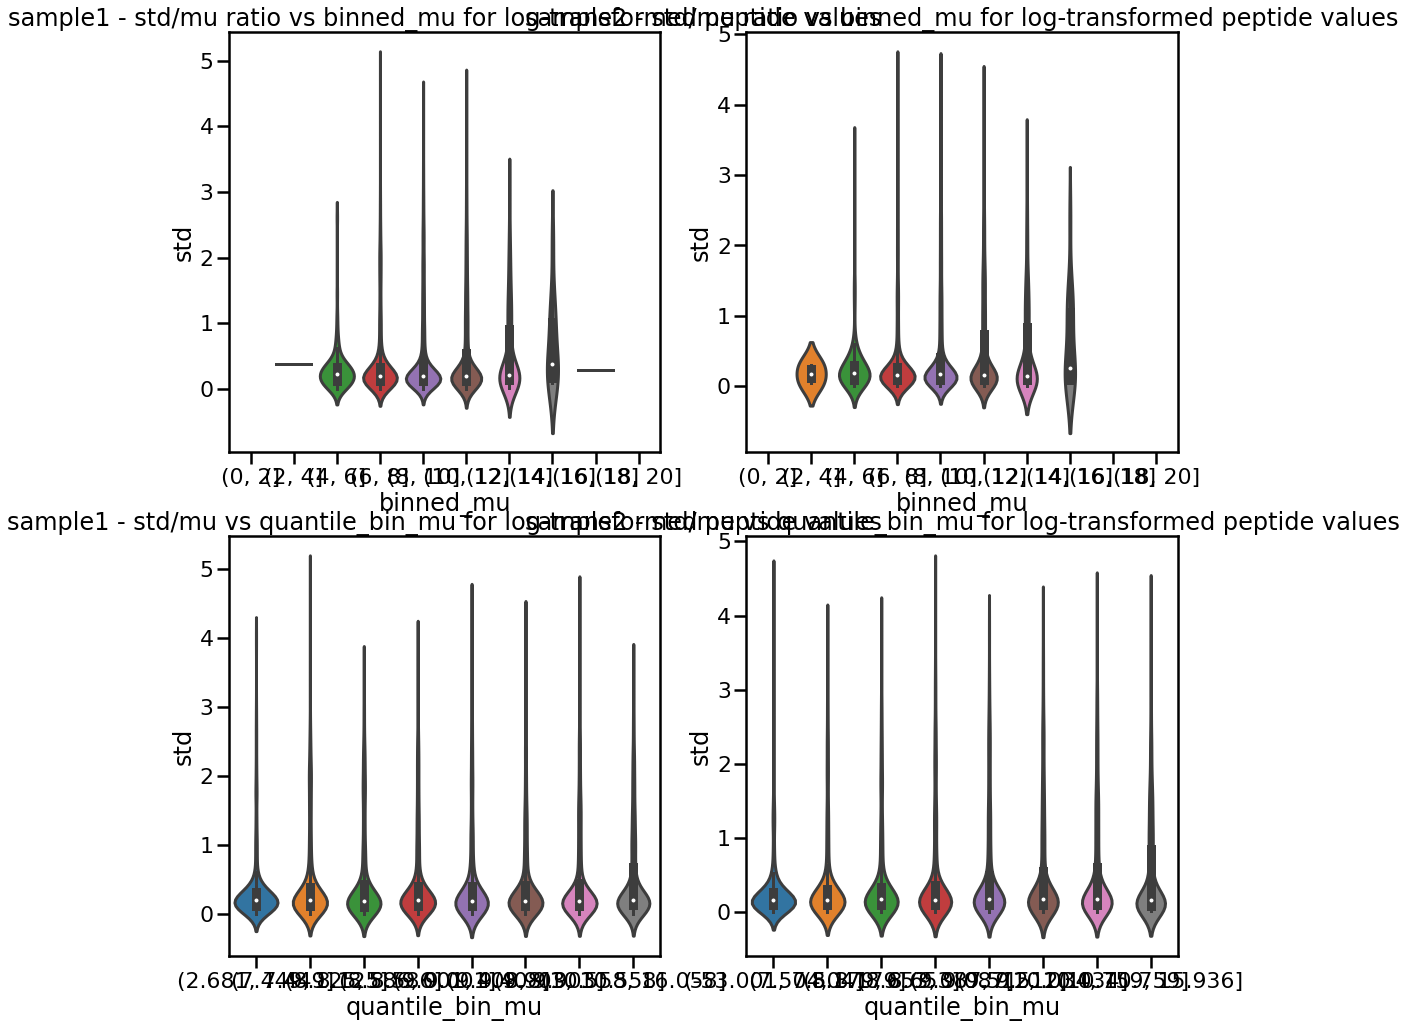

In [62]:
f, ax = plt.subplots(2, 2, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample1, ax=ax[0,0])
ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")

sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample2, ax=ax[0,1])
ax[0,1].set_title("sample2 - std/mu ratio vs binned_mu for log-transformed peptide values")

sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample1, ax=ax[1,0])
ax[1,0].set_title("sample1 - std/mu vs quantile_bin_mu for log-transformed peptide values")

sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample2, ax=ax[1,1])
ax[1,1].set_title("sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values")


In [63]:
df["intensity"] = df[0]
df = df.drop([0], axis = 1)
df_stats = get_peptide_mu_sigma(df)

In [64]:
df.intensity.values.max()

17.78380333372424

In [65]:
df_stats["mu"] 

bins = [i*2 for i in range(11)]
df_stats["binned_mu"] = pd.cut(df_stats["mu"], bins,  include_lowest=True)
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=20)




In [66]:
df_stats


,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.783597,0.185578,0.015749,"(10.0, 12.0]","(11.208, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.294025,NaN,NaN,"(8.0, 10.0]","(9.294, 9.46]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.718668,0.053571,0.004998,"(10.0, 12.0]","(10.697, 11.208]"
(UniMod:1)AAAAAGTATSQR,9.853943,0.150134,0.015236,"(8.0, 10.0]","(9.847, 10.071]"
(UniMod:1)AAAAELSLLEK,8.821558,1.407926,0.159601,"(8.0, 10.0]","(8.804, 8.976]"
...,...,...,...,...,...
YYSIASSSK,7.983908,0.211825,0.026531,"(6.0, 8.0]","(7.859, 8.092]"
YYSIYDLGNNAVGLAK,9.146827,0.526852,0.057599,"(8.0, 10.0]","(9.136, 9.294]"
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,8.049033,NaN,NaN,"(8.0, 10.0]","(7.859, 8.092]"


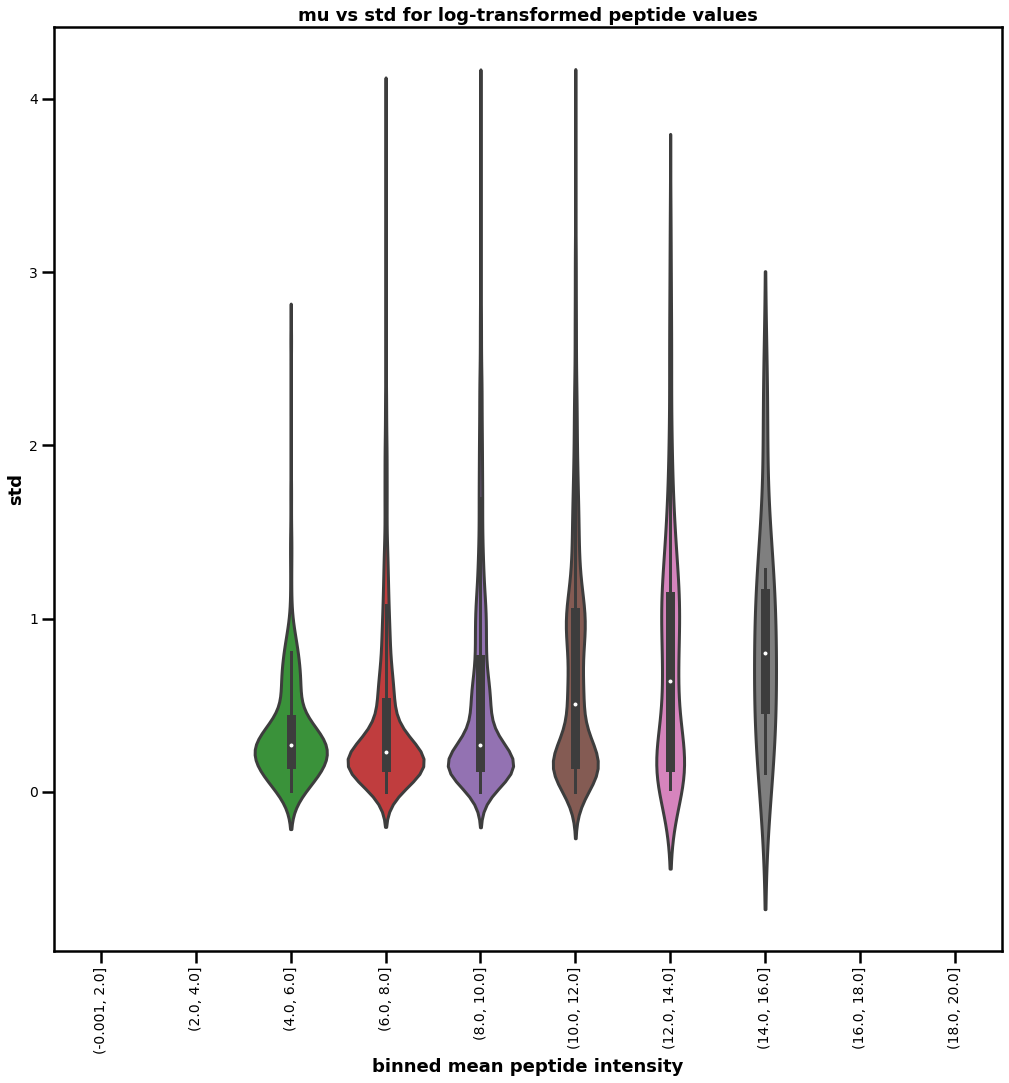

In [67]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)


In [68]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.783597,0.185578,0.015749,"(10.0, 12.0]","(11.208, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.294025,NaN,NaN,"(8.0, 10.0]","(9.294, 9.46]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.718668,0.053571,0.004998,"(10.0, 12.0]","(10.697, 11.208]"
(UniMod:1)AAAAAGTATSQR,9.853943,0.150134,0.015236,"(8.0, 10.0]","(9.847, 10.071]"
(UniMod:1)AAAAELSLLEK,8.821558,1.407926,0.159601,"(8.0, 10.0]","(8.804, 8.976]"
...,...,...,...,...,...
YYSIASSSK,7.983908,0.211825,0.026531,"(6.0, 8.0]","(7.859, 8.092]"
YYSIYDLGNNAVGLAK,9.146827,0.526852,0.057599,"(8.0, 10.0]","(9.136, 9.294]"
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,8.049033,NaN,NaN,"(8.0, 10.0]","(7.859, 8.092]"


# Adjust to remove peptides with missing values in samples

In [69]:
peptides_included_in_all_samples = (df.groupby("FullPeptideName").count() >= 6).index

In [70]:
df_filtered = df[df.index.get_level_values("FullPeptideName").isin(peptides_included_in_all_samples)]

In [71]:
df_stats_filtered = get_peptide_mu_sigma(df_filtered)

In [72]:
bins = [i*2 for i in range(11)]
df_stats_filtered["binned_mu"] = pd.cut(df_stats_filtered["mu"], bins,  include_lowest=True)
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=8)


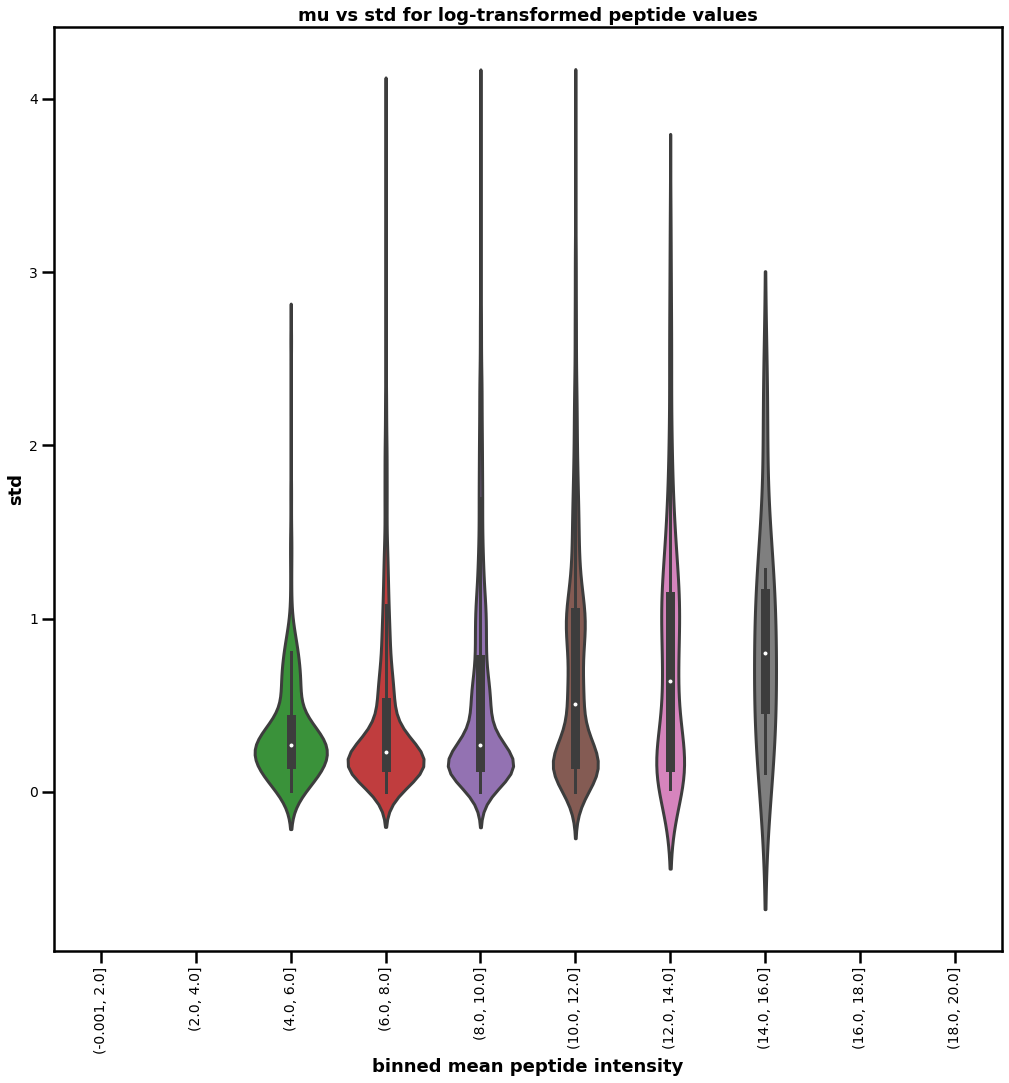

In [73]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats_filtered, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)



In [74]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.783597,0.185578,0.015749,"(10.0, 12.0]","(11.208, 15.997]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.294025,NaN,NaN,"(8.0, 10.0]","(9.294, 9.46]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.718668,0.053571,0.004998,"(10.0, 12.0]","(10.697, 11.208]"
(UniMod:1)AAAAAGTATSQR,9.853943,0.150134,0.015236,"(8.0, 10.0]","(9.847, 10.071]"
(UniMod:1)AAAAELSLLEK,8.821558,1.407926,0.159601,"(8.0, 10.0]","(8.804, 8.976]"
...,...,...,...,...,...
YYSIASSSK,7.983908,0.211825,0.026531,"(6.0, 8.0]","(7.859, 8.092]"
YYSIYDLGNNAVGLAK,9.146827,0.526852,0.057599,"(8.0, 10.0]","(9.136, 9.294]"
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,8.049033,NaN,NaN,"(8.0, 10.0]","(7.859, 8.092]"


# Quantile binning

In [75]:
q = 10
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=q, precision = 0)
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=q, precision = 0)


In [76]:
bin_median_function = lambda x: round((x.left + x.right)/2, 2)
df_stats["quantile_bin_mu_median_of_bin_range"] = df_stats["quantile_bin_mu"].apply(bin_median_function)
df_stats_filtered["quantile_bin_mu_median_of_bin_range"] = df_stats_filtered["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


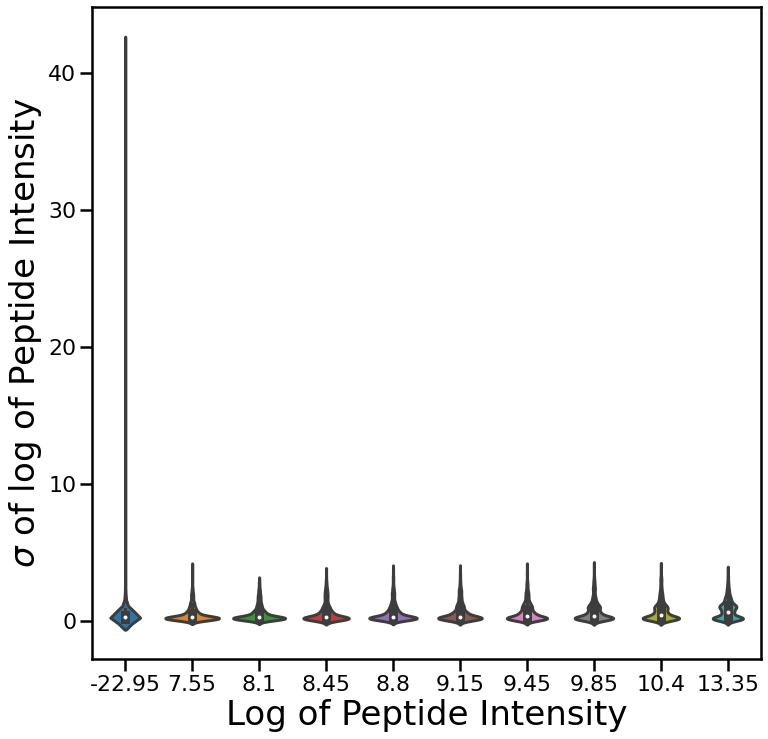

In [77]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


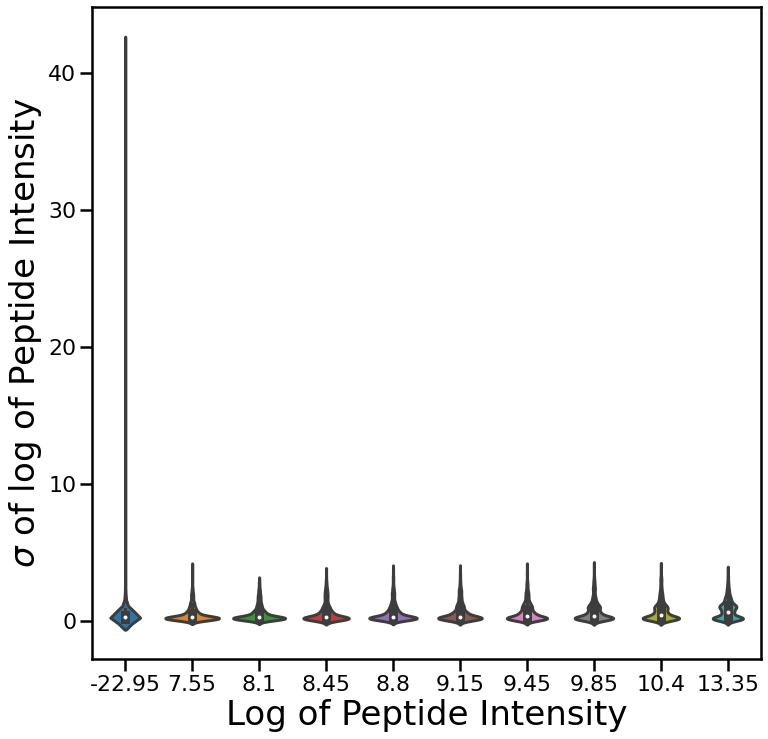

In [78]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")

#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)

#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


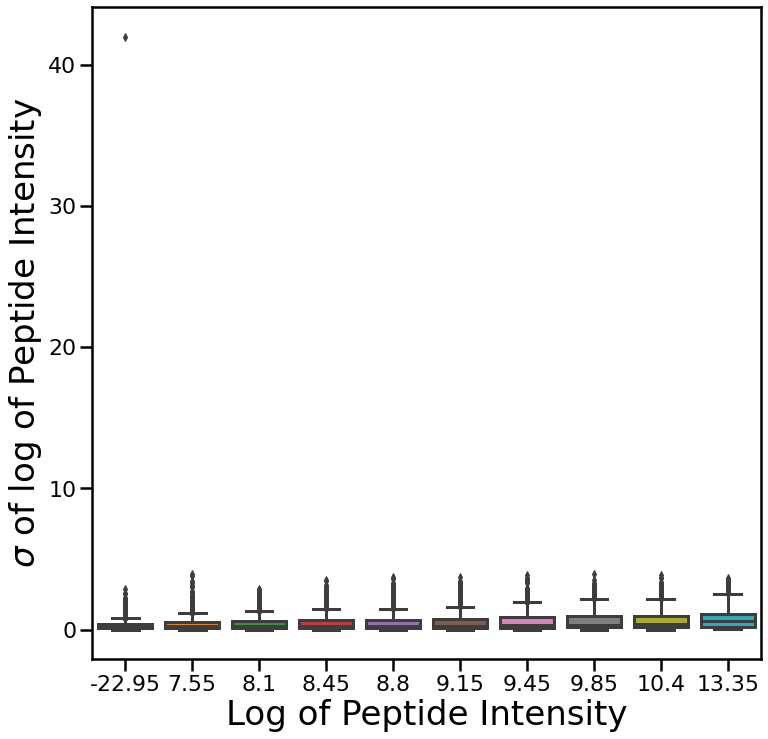

In [79]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)


ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)


#ax.set_ylim([-1,6])

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0.0, 5.0)

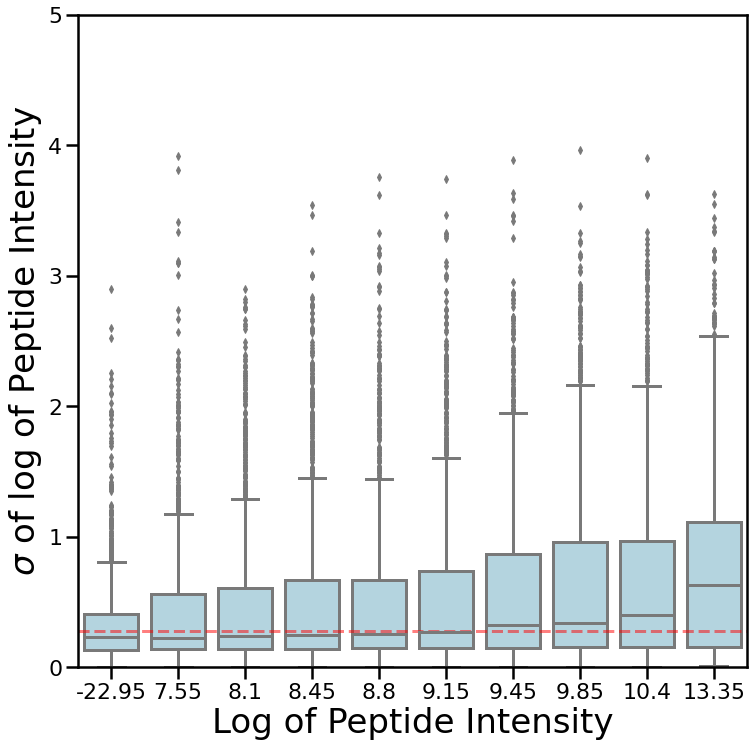

In [80]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
ax.axhline(y=df_stats_filtered["std"].median(), color='r', linestyle='--', alpha = 0.5)
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax, color="lightblue")


ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.

ax.set_ylim([0,5])

#ax.set_ylim([-1,6])

# KDE histograms of the bin-distributions

In [81]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu,quantile_bin_mu_median_of_bin_range
FullPeptideName,,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,11.783597,0.185578,0.015749,"(10.0, 12.0]","(10.7, 16.0]",13.35
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,9.294025,NaN,NaN,"(8.0, 10.0]","(9.3, 9.6]",9.45
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,10.718668,0.053571,0.004998,"(10.0, 12.0]","(10.7, 16.0]",13.35
(UniMod:1)AAAAAGTATSQR,9.853943,0.150134,0.015236,"(8.0, 10.0]","(9.6, 10.1]",9.85
(UniMod:1)AAAAELSLLEK,8.821558,1.407926,0.159601,"(8.0, 10.0]","(8.6, 9.0]",8.80
...,...,...,...,...,...,...
YYSIASSSK,7.983908,0.211825,0.026531,"(6.0, 8.0]","(7.9, 8.3]",8.10
YYSIYDLGNNAVGLAK,9.146827,0.526852,0.057599,"(8.0, 10.0]","(9.0, 9.3]",9.15
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,8.049033,NaN,NaN,"(8.0, 10.0]","(7.9, 8.3]",8.10


In [82]:
bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

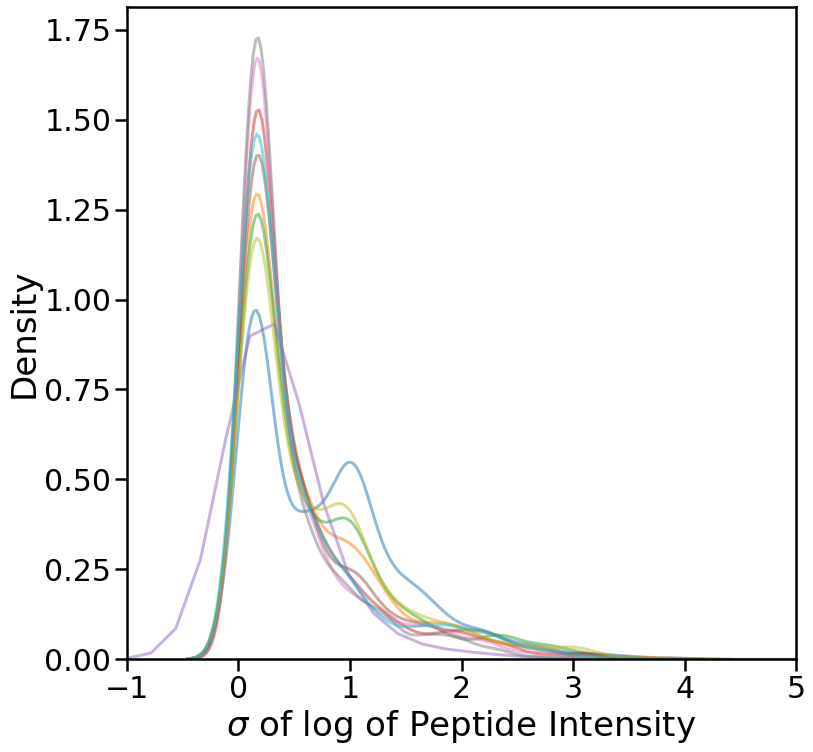

In [83]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)



for line in ax.get_lines():
    line.set_alpha(0.5)

In [84]:
bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()

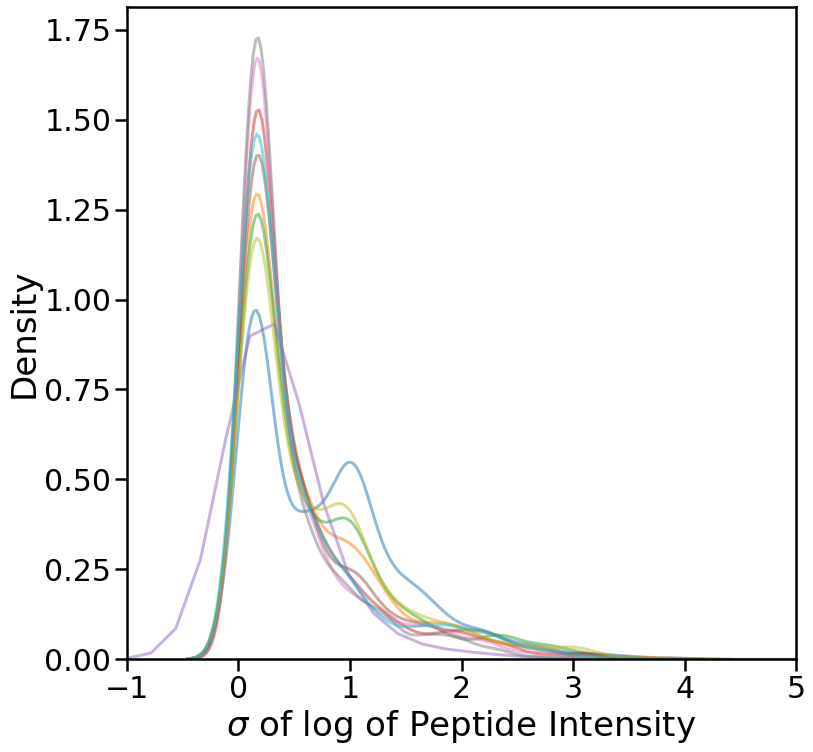

In [85]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)


for line in ax.get_lines():
    line.set_alpha(0.5)

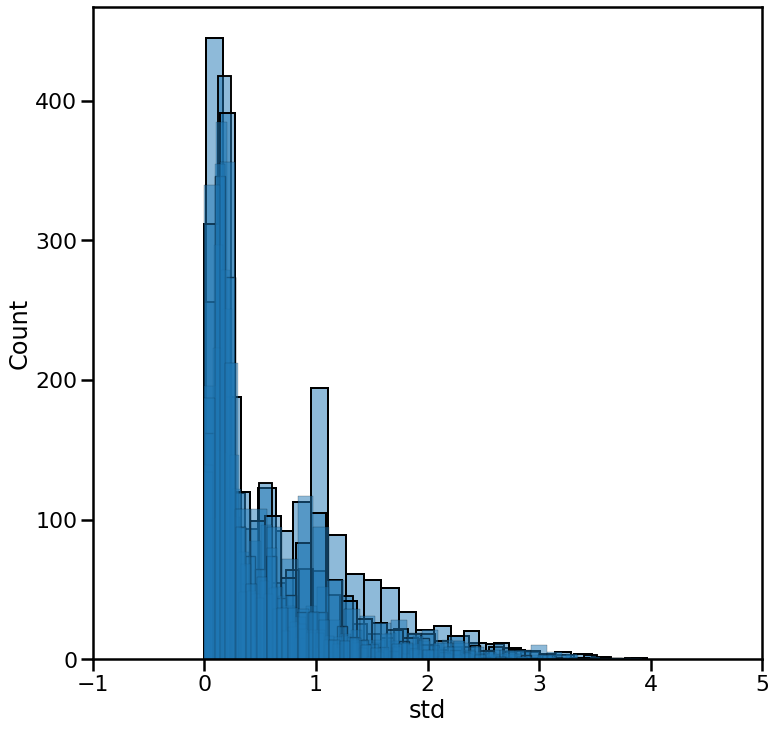

In [86]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.histplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

for line in ax.get_lines():
    line.set_alpha(0.5)

# Violin overlap

In [87]:
from matplotlib.pyplot import cm
n = len(bin_vals)
color = cm.rainbow(np.linspace(0, 1, n))

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

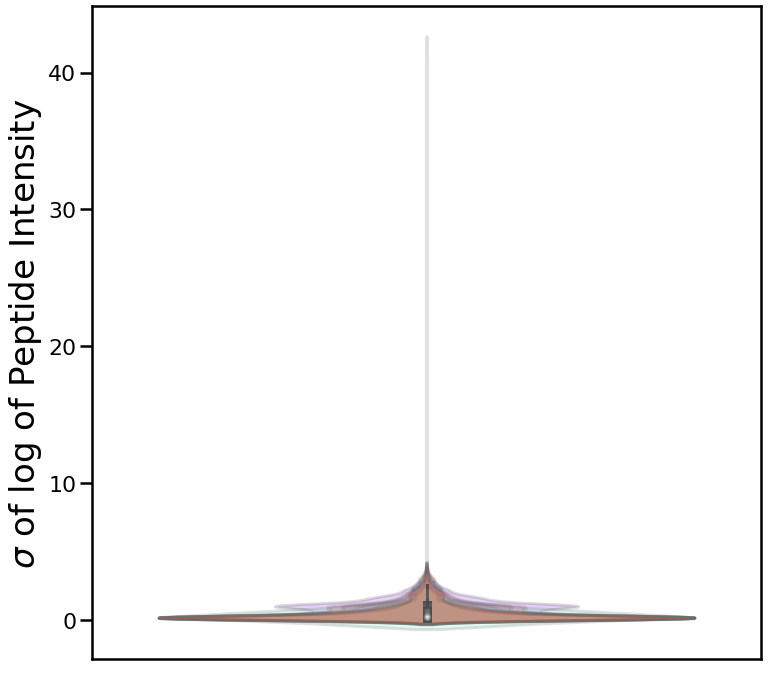

In [88]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

for i in range(len(bin_vals)):
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

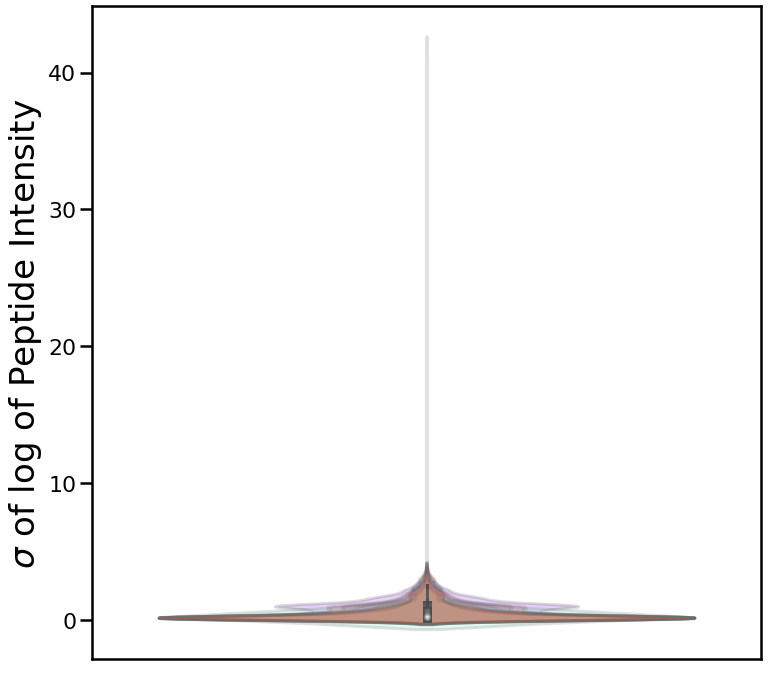

In [89]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()
for i in range(len(bin_vals)):
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
